Credit given to PyAutoLens' introductory tutorial on strong gravitational lensing: https://pyautolens.readthedocs.io/en/latest/overview/overview_1_lensing.html

In [9]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

import matplotlib.pyplot as plt
from os import path

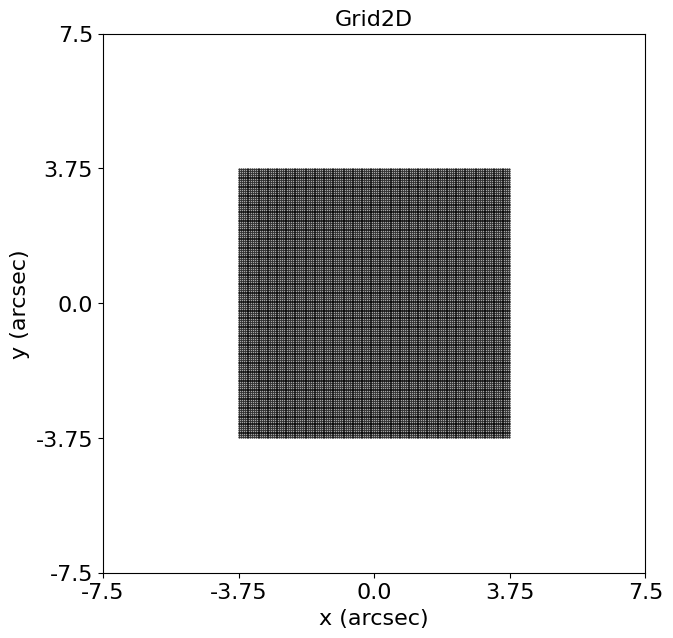

In [2]:
grid_2d = al.Grid2D.uniform(
    shape_native=(150, 150),
    pixel_scales=0.05,  # <- The pixel-scale describes the conversion from pixel units to arc-seconds.
)

grid_2d_plotter = aplt.Grid2DPlotter(grid=grid_2d)
grid_2d_plotter.figure_2d()

In [3]:
sersic_light_profile = al.lp.Sersic(
    centre=(0.0, 0.0),
    ell_comps=(0.2, 0.1),
    intensity=0.005,
    effective_radius=2.0,
    sersic_index=4.0,
)

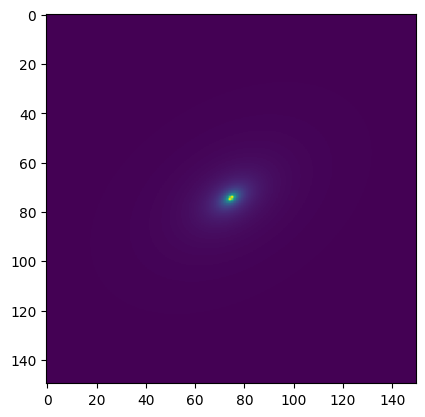

In [4]:
image_2d = sersic_light_profile.image_2d_from(grid=grid_2d)

plt.imshow(image_2d.native) 

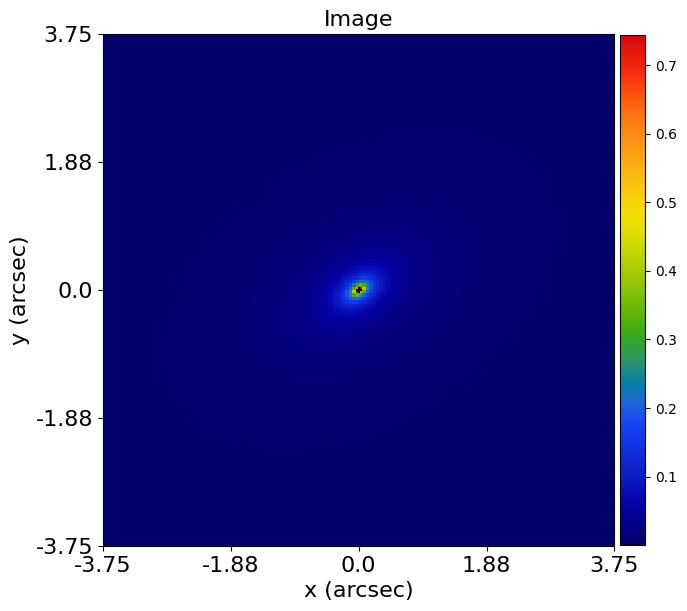

In [5]:
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=sersic_light_profile, grid=grid_2d
)
light_profile_plotter.figures_2d(image=True)

In [6]:
isothermal_mass_profile = al.mp.Isothermal(
    centre=(0.0, 0.0), ell_comps=(0.1, 0.0), einstein_radius=1.6
)

deflections = isothermal_mass_profile.deflections_yx_2d_from(grid=grid_2d)

In [7]:
lens_galaxy = al.Galaxy(
    redshift=0.5, light=sersic_light_profile, mass=isothermal_mass_profile
)

source_light_profile = al.lp.Exponential(
    centre=(0.3, 0.2),
    ell_comps=(0.1, 0.0),
    intensity=0.1,
    effective_radius=0.5
)

source_galaxy = al.Galaxy(redshift=1.0, light=source_light_profile)

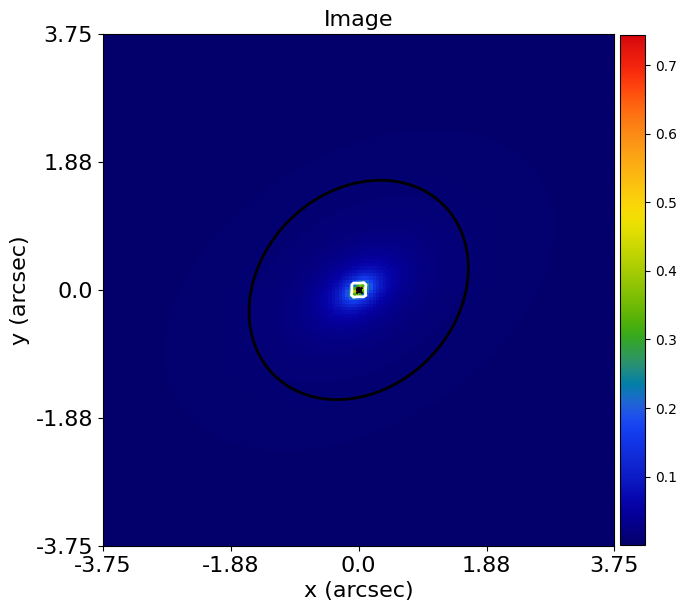

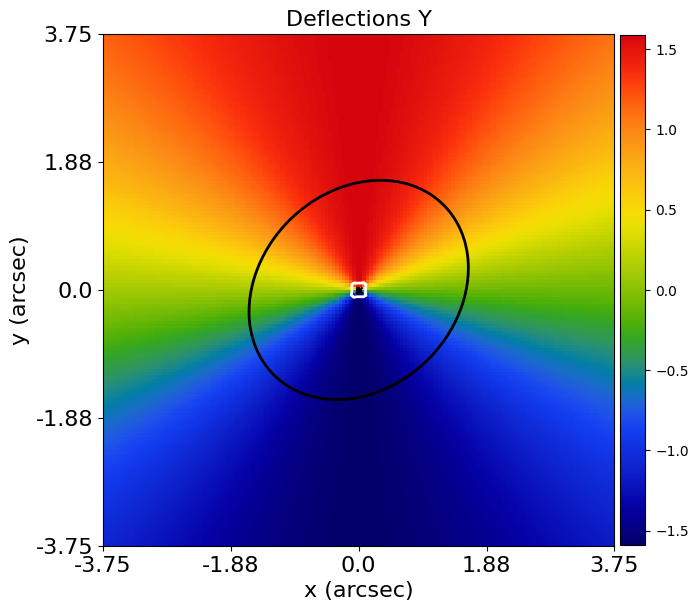

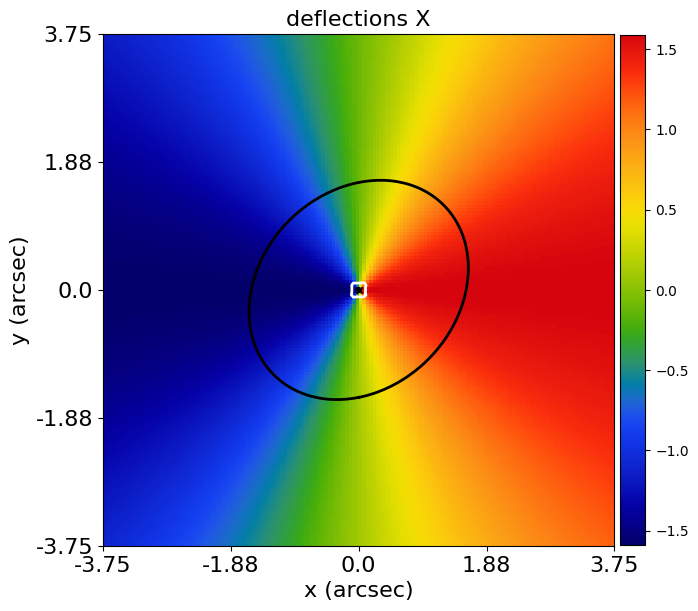

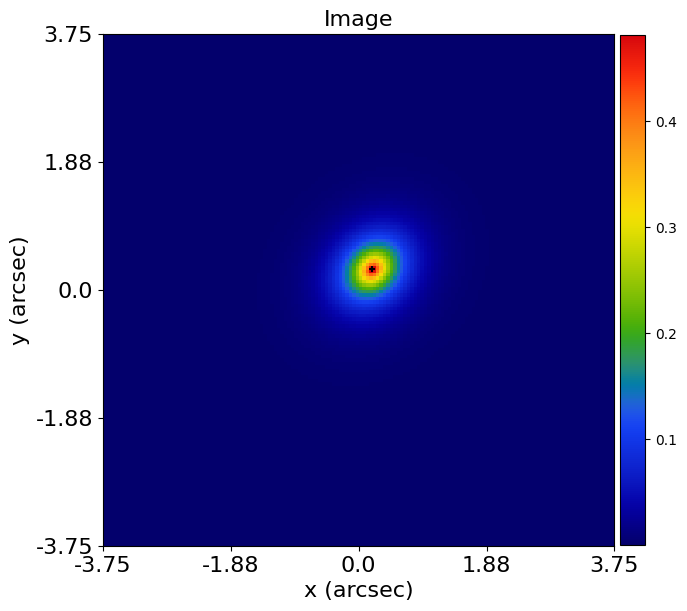

In [8]:
lens_galaxy_plotter = aplt.GalaxyPlotter(galaxy=lens_galaxy, grid=grid_2d)
lens_galaxy_plotter.figures_2d(image=True, deflections_y=True, deflections_x=True)

source_galaxy_plotter = aplt.GalaxyPlotter(galaxy=source_galaxy, grid=grid_2d)
source_galaxy_plotter.figures_2d(image=True)